In [23]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf

In [27]:
start='2014-01-01'
end='2023-12-31'
stock='TSLA'

In [67]:
#Reading dataset
Tesla=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [61]:
#First five records
Tesla.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2014-01-02,10.006667,10.006667,10.165333,9.770000,9.986667,92826000
2014-01-03,9.970667,9.970667,10.146000,9.906667,10.000000,70425000
2014-01-06,9.800000,9.800000,10.026667,9.682667,10.000000,80416500
2014-01-07,9.957333,9.957333,10.026667,9.683333,9.841333,75511500
2014-01-08,10.085333,10.085333,10.246667,9.917333,9.923333,92448000


In [69]:
#Assigning index
Tesla.reset_index(inplace=True)

In [71]:
Tesla

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
0,2014-01-02,10.006667,10.006667,10.165333,9.770000,9.986667,92826000
1,2014-01-03,9.970667,9.970667,10.146000,9.906667,10.000000,70425000
2,2014-01-06,9.800000,9.800000,10.026667,9.682667,10.000000,80416500
3,2014-01-07,9.957333,9.957333,10.026667,9.683333,9.841333,75511500
4,2014-01-08,10.085333,10.085333,10.246667,9.917333,9.923333,92448000
...,...,...,...,...,...,...,...
2511,2023-12-22,252.539993,252.539993,258.220001,251.369995,256.760010,93249800
2512,2023-12-26,256.609985,256.609985,257.970001,252.910004,254.490005,86892400
2513,2023-12-27,261.440002,261.440002,263.339996,257.519989,258.350006,106494400


In [81]:
#Calculating moving average
Mavg_100_days=Tesla.Close.rolling(100).mean()
Mavg_100_days

Ticker,TSLA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2511,241.505100
2512,241.477999
2513,241.553799
2514,241.571099


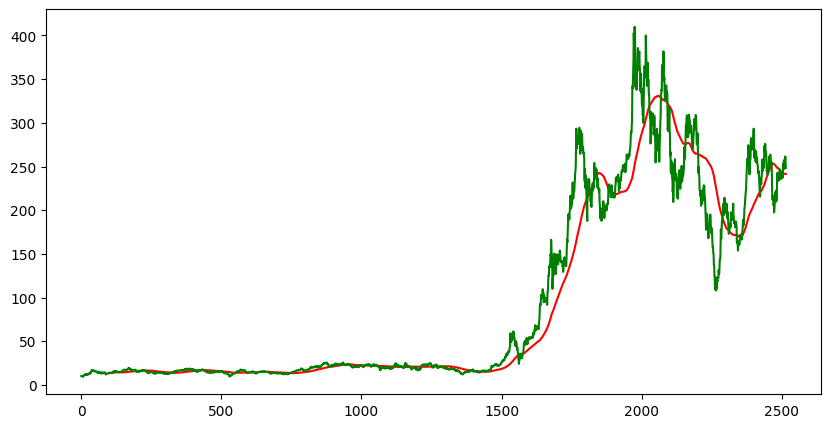

In [83]:
#Plotting 100 days moving average VS closing price
plt.figure(figsize=(10,5))
plt.plot(Mavg_100_days,'red')
plt.plot(Tesla.Close,'green')
plt.show()

In [85]:
Mavg_200_days=Tesla.Close.rolling(200).mean()
Mavg_200_days

Ticker,TSLA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2511,227.70775
2512,228.12360
2513,228.55840
2514,228.90800


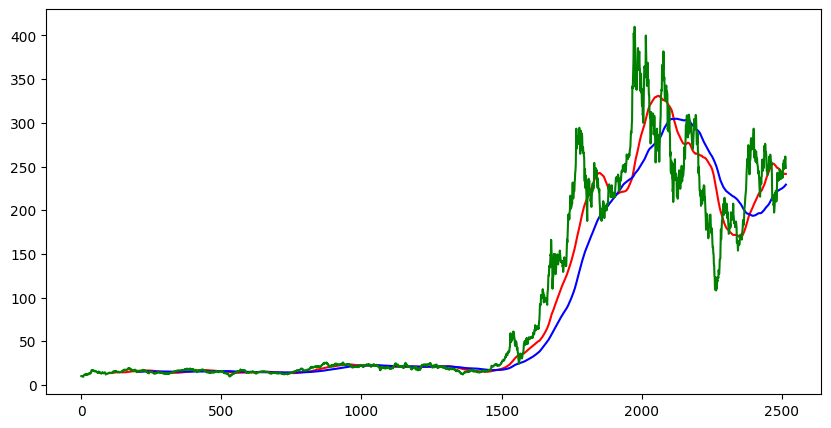

In [87]:
#Plotting 100 days moving average VS 200 days moving average VS closing price
plt.figure(figsize=(10,5))
plt.plot(Mavg_100_days,'red')
plt.plot(Mavg_200_days,'blue')
plt.plot(Tesla.Close,'green')
plt.show()

In [91]:
Tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           2516 non-null   datetime64[ns]
 1   (Adj Close, TSLA)  2516 non-null   float64       
 2   (Close, TSLA)      2516 non-null   float64       
 3   (High, TSLA)       2516 non-null   float64       
 4   (Low, TSLA)        2516 non-null   float64       
 5   (Open, TSLA)       2516 non-null   float64       
 6   (Volume, TSLA)     2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 137.7 KB


In [105]:
#Dropping null values
Tesla.dropna(inplace=True)

In [107]:
#Splitting data into train and test
Tesla_train=pd.DataFrame(Tesla.Close[0:int(len(Tesla)*0.80)])
Tesla_test=pd.DataFrame(Tesla.Close[int(len(Tesla)*0.80):len(Tesla)])

In [109]:
#For model traning
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [111]:
Tesla_train_scale=scaler.fit_transform(Tesla_train)

In [113]:
x=[]
y=[]
for i in range(100,Tesla_train_scale.shape[0]):
    x.append(Tesla_train_scale[i-100:i])
    y.append(Tesla_train_scale[i,0])

In [115]:
x,y=np.array(x),np.array(y)

In [117]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from keras.layers import Input

In [118]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [121]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [123]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - loss: 0.0318
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 0.0050
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 0.0033
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.0031
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 0.0032
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 0.0029
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 0.0030
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 0.0031
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 0.0030
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 0.0031
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 0.0027
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 0.0024
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 0.0023
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 0.0026
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - l

In [125]:
#For testing model

In [127]:
Last_100_days=Tesla_train.tail(100)

In [129]:
Tesla_test=pd.concat([Last_100_days,Tesla_test],ignore_index=True)

In [131]:
Tesla_test_scale=scaler.fit_transform(Tesla_test)

In [133]:
x=[]
y=[]
for i in range(100,Tesla_test_scale.shape[0]):
    x.append(Tesla_test_scale[i-100:i])
    y.append(Tesla_test_scale[i,0])

In [135]:
x,y=np.array(x),np.array(y)

In [137]:
y_pred=model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


In [139]:
scale=1/scaler.scale_

In [141]:
y_pred=y_pred*scale

In [143]:
y=y*scale

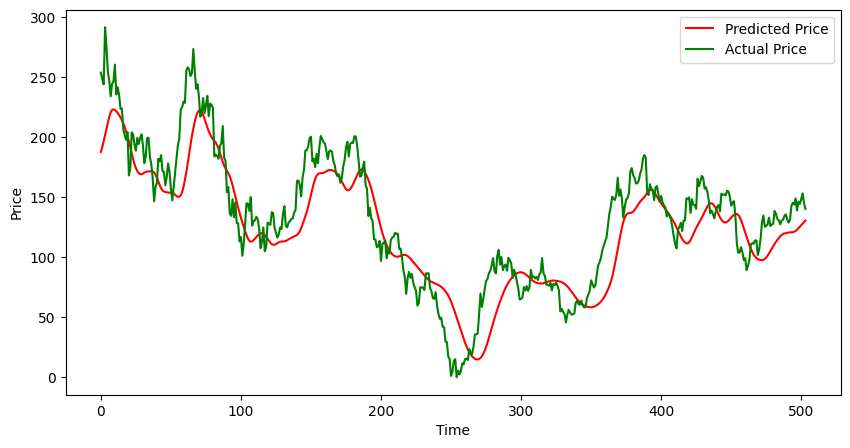

In [145]:
plt.figure(figsize=(10,5))
plt.plot(y_pred,'red',label='Predicted Price')
plt.plot(y,'green',label='Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [149]:
model.save('Stock Price Prediction.keras')